In [1]:
import os
import sqlite3
import pandas as pd

In [2]:
os.chdir("A:\DATA\Imartics\Python\database")

In [3]:
conn = sqlite3.connect('database.sqlite')
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
print(cursor.fetchall())

cursor.execute("PRAGMA table_info('Salaries')")
cols = cursor.fetchall()
for col in cols:
    print(col[1])

[('Salaries',)]
Id
EmployeeName
JobTitle
BasePay
OvertimePay
OtherPay
Benefits
TotalPay
TotalPayBenefits
Year
Notes
Agency
Status


In [4]:
df = pd.read_sql_query("""SELECT * FROM Salaries""", conn)
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,,326373.19,326373.19,2011,,San Francisco,


Retrieve the top 8 rows from the table.

In [5]:
row=pd.read_sql_query("SELECT * FROM Salaries LIMIT 8",conn)
row

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,,326373.19,326373.19,2011,,San Francisco,
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.00,8601.00,189082.74,,316285.74,316285.74,2011,,San Francisco,
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.90,134426.14,,315981.05,315981.05,2011,,San Francisco,
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0.00,51322.50,,307899.46,307899.46,2011,,San Francisco,


In [6]:
df.head(8)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,,326373.19,326373.19,2011,,San Francisco,
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602,8601,189083,,316285.74,316285.74,2011,,San Francisco,
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492,89062.9,134426,,315981.05,315981.05,2011,,San Francisco,
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256577,0,51322.5,,307899.46,307899.46,2011,,San Francisco,


What is the average TotalPay?

In [7]:
avg =pd.read_sql_query("""SELECT AVG(TotalPay) FROM Salaries""", conn)
avg

,AVG(TotalPay)
0,74768.321972


In [8]:
df.loc[df.TotalPay == max(df.TotalPay)]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,,567595.43,567595.43,2011,,San Francisco,


What is the highest amount of BasePay in the dataset?

In [9]:
BS = pd.read_sql_query("""SELECT BasePay FROM Salaries where BasePay!='Not Provided' and BasePay!=' ' """, conn)
BS

,BasePay
0,167411
1,155966
2,212739
3,77916
4,134402
...,...
148645,0
148646,0
148647,0
148648,0


In [10]:
pd.read_sql_query("""SELECT max(CAST(BasePay as INT))FROM Salaries """, conn)


,max(CAST(BasePay as INT))
0,319275


In [11]:
BS1 = pd.read_sql_query("""SELECT BasePay FROM Salaries""", conn)

In [12]:
l1 = list(df['BasePay'])

In [13]:
import re
l2=[]
for i in l1:
    a=(re.findall(r"[-+]?\d*\.\d+|\d+",str(i)))
    if (a):
        l2.append(float(a[0]))
max(l2)

319275.01

 What is the Job title of 'NATHANIEL FORD'?

In [14]:
NF = pd.read_sql_query("""SELECT JobTitle FROM Salaries WHERE EmployeeName = 'NATHANIEL FORD' """, conn)
NF

,JobTitle
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY


How much 'TotalPayBenefits' is made by 'NATHANIEL FORD'?

In [15]:
NFt = pd.read_sql_query("""SELECT TotalPayBenefits FROM Salaries WHERE EmployeeName = 'NATHANIEL FORD' """, conn)
NFt

,TotalPayBenefits
0,567595.43


What was the average (mean) TotalPay of all employees per year? (Output for each year from 2011 to 2014 separately)

In [16]:
DF1 = pd.read_sql_query("""SELECT AVG(TotalPay) FROM Salaries WHERE Year = 2011 """, conn)
DF1

,AVG(TotalPay)
0,71744.103871


In [17]:
DF2 = pd.read_sql_query("""SELECT AVG(TotalPay) FROM Salaries WHERE Year = 2012 """, conn)
DF2

,AVG(TotalPay)
0,74113.262265


In [18]:
df3 = pd.read_sql_query("""SELECT AVG(TotalPay) FROM Salaries WHERE Year = 2012 """, conn)
df3

,AVG(TotalPay)
0,74113.262265


In [19]:
df4 = pd.read_sql_query("""SELECT AVG(TotalPay) FROM Salaries WHERE Year = 2013 """, conn)
df4

,AVG(TotalPay)
0,77611.443142


In [20]:
df5 = pd.read_sql_query("""SELECT AVG(TotalPay) FROM Salaries WHERE Year = 2014 """, conn)
df5

,AVG(TotalPay)
0,75463.91814


How many unique jobs are there?

In [21]:
jt = pd.read_sql_query("""SELECT JobTitle FROM Salaries GROUP BY JobTitle""", conn)
jt

,JobTitle
0,ACCOUNT CLERK
1,ACCOUNTANT
2,ACCOUNTANT INTERN
3,"ACPO,JuvP, Juv Prob (SFERS)"
4,ACUPUNCTURIST
...,...
2154,X-RAY LABORATORY AIDE
2155,X-Ray Laboratory Aide
2156,"YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS"
2157,Youth Comm Advisor


What are the top 5 most common jobs?

In [22]:
jt5 = pd.read_sql_query("""SELECT JobTitle FROM Salaries GROUP BY JobTitle ORDER BY COUNT(JobTitle) ASC LIMIT 5""", conn)
jt5

,JobTitle
0,"ACPO,JuvP, Juv Prob (SFERS)"
1,ACUPUNCTURIST
2,"ADMINISTRATOR, SFGH MEDICAL CENTER"
3,"AIRPORT ASSISTANT DEPUTY DIRECTOR, BUSINESS AD..."
4,"AIRPORT ASSISTANT DEPUTY DIRECTOR, OPERATIONS"


How many people have the word Chief in their job title?

In [23]:
jtc = pd.read_sql_query("""SELECT COUNT(JobTitle) FROM Salaries WHERE JobTitle LIKE '%CHIEF%' """, conn)
jtc

,COUNT(JobTitle)
0,627


In [24]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,,326373.19,326373.19,2011,,San Francisco,


# EDA

In [25]:
from pandas_profiling import ProfileReport

In [26]:
df.head(10)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,,326373.19,326373.19,2011,,San Francisco,
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602,8601,189083,,316285.74,316285.74,2011,,San Francisco,
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492,89062.9,134426,,315981.05,315981.05,2011,,San Francisco,
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256577,0,51322.5,,307899.46,307899.46,2011,,San Francisco,
8,9,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176933,86362.7,40132.2,,303427.55,303427.55,2011,,San Francisco,
9,10,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262,0,17115.7,,302377.73,302377.73,2011,,San Francisco,


In [27]:
dfp=ProfileReport(df,title="database")
dfp.to_notebook_iframe()

In [28]:
df.isnull().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Notes               0
Agency              0
Status              0
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148654 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          148654 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             148654 non-null  object 
 11  Agency            148654 non-null  object 
 12  Status            148654 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 14.7+ MB


In [30]:
df["BasePay"]

0               167411
1               155966
2               212739
3                77916
4               134402
              ...     
148649               0
148650    Not Provided
148651    Not Provided
148652    Not Provided
148653               0
Name: BasePay, Length: 148654, dtype: object

In [31]:
df[df==0].count()

Id                      0
EmployeeName            0
JobTitle                0
BasePay              1298
OvertimePay         77321
OtherPay            41600
Benefits             1734
TotalPay              368
TotalPayBenefits       30
Year                    0
Notes                   0
Agency                  0
Status                  0
dtype: int64

In [32]:
import numpy as np

In [33]:
cols = ["JobTitle","BasePay","OvertimePay","OtherPay","Benefits","TotalPay","TotalPayBenefits"]
df[cols] = df[cols].replace({'Not provided':np.nan,'Not Provided':np.nan,'':0})

In [34]:
df.isnull().sum()

Id                  0
EmployeeName        0
JobTitle            4
BasePay             4
OvertimePay         4
OtherPay            4
Benefits            4
TotalPay            0
TotalPayBenefits    0
Year                0
Notes               0
Agency              0
Status              0
dtype: int64

In [35]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

Id                  0.000000
EmployeeName        0.000000
JobTitle            0.002691
BasePay             0.002691
OvertimePay         0.002691
OtherPay            0.002691
Benefits            0.002691
TotalPay            0.000000
TotalPayBenefits    0.000000
Year                0.000000
Notes               0.000000
Agency              0.000000
Status              0.000000
dtype: float64

In [36]:
df=df.drop(['TotalPayBenefits','Id'], axis = 1) 

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   EmployeeName  148654 non-null  object 
 1   JobTitle      148650 non-null  object 
 2   BasePay       148650 non-null  float64
 3   OvertimePay   148650 non-null  float64
 4   OtherPay      148650 non-null  float64
 5   Benefits      148650 non-null  float64
 6   TotalPay      148654 non-null  float64
 7   Year          148654 non-null  int64  
 8   Notes         148654 non-null  object 
 9   Agency        148654 non-null  object 
 10  Status        148654 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 12.5+ MB


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   EmployeeName  148654 non-null  object 
 1   JobTitle      148650 non-null  object 
 2   BasePay       148650 non-null  float64
 3   OvertimePay   148650 non-null  float64
 4   OtherPay      148650 non-null  float64
 5   Benefits      148650 non-null  float64
 6   TotalPay      148654 non-null  float64
 7   Year          148654 non-null  int64  
 8   Notes         148654 non-null  object 
 9   Agency        148654 non-null  object 
 10  Status        148654 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 12.5+ MB


In [39]:
df.dropna()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,Year,Notes,Agency,Status
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,2011,,San Francisco,
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,2011,,San Francisco,
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,2011,,San Francisco,
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,2011,,San Francisco,
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,2011,,San Francisco,
...,...,...,...,...,...,...,...,...,...,...,...
148645,Carolyn A Wilson,Human Services Technician,0.00,0.00,0.00,0.0,0.00,2014,,San Francisco,PT
148647,Joann Anderson,Communications Dispatcher 2,0.00,0.00,0.00,0.0,0.00,2014,,San Francisco,PT
148648,Leon Walker,Custodian,0.00,0.00,0.00,0.0,0.00,2014,,San Francisco,PT
148649,Roy I Tillery,Custodian,0.00,0.00,0.00,0.0,0.00,2014,,San Francisco,PT


In [40]:
df.isna().sum()

EmployeeName    0
JobTitle        4
BasePay         4
OvertimePay     4
OtherPay        4
Benefits        4
TotalPay        0
Year            0
Notes           0
Agency          0
Status          0
dtype: int64

In [41]:
df.dropna( inplace=True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148650 entries, 0 to 148653
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   EmployeeName  148650 non-null  object 
 1   JobTitle      148650 non-null  object 
 2   BasePay       148650 non-null  float64
 3   OvertimePay   148650 non-null  float64
 4   OtherPay      148650 non-null  float64
 5   Benefits      148650 non-null  float64
 6   TotalPay      148650 non-null  float64
 7   Year          148650 non-null  int64  
 8   Notes         148650 non-null  object 
 9   Agency        148650 non-null  object 
 10  Status        148650 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 13.6+ MB


In [43]:
df.tail(10)

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,Year,Notes,Agency,Status
148640,Charlene D Mccully,Parking Control Officer,0.0,0.0,0.00,0.0,0.00,2014,,San Francisco,PT
148641,Raphael Marquis Goins,Museum Guard,0.0,0.0,0.00,0.0,0.00,2014,,San Francisco,PT
148642,Dominic C Marquez,Sign Worker,0.0,0.0,0.00,0.0,0.00,2014,,San Francisco,PT
148643,Kim Brewer,Parking Control Officer,0.0,0.0,0.00,0.0,0.00,2014,,San Francisco,PT
148644,Randy D Winn,"Stationary Eng, Sewage Plant",0.0,0.0,0.00,0.0,0.00,2014,,San Francisco,PT
148645,Carolyn A Wilson,Human Services Technician,0.0,0.0,0.00,0.0,0.00,2014,,San Francisco,PT
148647,Joann Anderson,Communications Dispatcher 2,0.0,0.0,0.00,0.0,0.00,2014,,San Francisco,PT
148648,Leon Walker,Custodian,0.0,0.0,0.00,0.0,0.00,2014,,San Francisco,PT
148649,Roy I Tillery,Custodian,0.0,0.0,0.00,0.0,0.00,2014,,San Francisco,PT
148653,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,2014,,San Francisco,PT


In [44]:
df['Notes'].unique()
df['Notes'].nunique()

1

In [45]:
df['Benefits'].unique()

array([0.000000e+00, 4.443012e+04, 6.981019e+04, ..., 2.200000e-01,
       1.300000e-01, 1.240000e+00])

In [46]:
df['Status'].unique()

array(['', 'PT', 'FT'], dtype=object)

In [47]:
df=df.drop(['Notes'], axis = 1) 

In [48]:
df.head(20)

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,Year,Agency,Status
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,2011,San Francisco,
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,2011,San Francisco,
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,2011,San Francisco,
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,2011,San Francisco,
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,2011,San Francisco,
5,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.00,8601.00,189082.74,0.0,316285.74,2011,San Francisco,
6,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.90,134426.14,0.0,315981.05,2011,San Francisco,
7,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0.00,51322.50,0.0,307899.46,2011,San Francisco,
8,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.68,40132.23,0.0,303427.55,2011,San Francisco,
9,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.00,0.00,17115.73,0.0,302377.73,2011,San Francisco,


In [49]:
df['OtherPay']=df['OtherPay']+df['Benefits']

In [50]:
df.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,Year,Agency,Status
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,2011,San Francisco,
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,2011,San Francisco,
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,2011,San Francisco,
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,2011,San Francisco,
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,2011,San Francisco,


In [51]:
df=df.drop(['Benefits'], axis = 1) 

In [52]:
df.head(20)

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,Year,Agency,Status
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,567595.43,2011,San Francisco,
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,538909.28,2011,San Francisco,
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,335279.91,2011,San Francisco,
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,332343.61,2011,San Francisco,
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,326373.19,2011,San Francisco,
5,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.00,8601.00,189082.74,316285.74,2011,San Francisco,
6,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.90,134426.14,315981.05,2011,San Francisco,
7,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0.00,51322.50,307899.46,2011,San Francisco,
8,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.68,40132.23,303427.55,2011,San Francisco,
9,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.00,0.00,17115.73,302377.73,2011,San Francisco,


In [53]:
type(df['BasePay'][1])

numpy.float64

In [54]:
top_index=max(df[df['Status']==''].index)

In [55]:
top_index

110530

In [56]:
df=df.drop(['Status'], axis = 1)

In [57]:
df.head(30)

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,Year,Agency
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,567595.43,2011,San Francisco
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,538909.28,2011,San Francisco
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,335279.91,2011,San Francisco
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,332343.61,2011,San Francisco
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,326373.19,2011,San Francisco
5,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.00,8601.00,189082.74,316285.74,2011,San Francisco
6,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.90,134426.14,315981.05,2011,San Francisco
7,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0.00,51322.50,307899.46,2011,San Francisco
8,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.68,40132.23,303427.55,2011,San Francisco
9,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.00,0.00,17115.73,302377.73,2011,San Francisco


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148650 entries, 0 to 148653
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   EmployeeName  148650 non-null  object 
 1   JobTitle      148650 non-null  object 
 2   BasePay       148650 non-null  float64
 3   OvertimePay   148650 non-null  float64
 4   OtherPay      148650 non-null  float64
 5   TotalPay      148650 non-null  float64
 6   Year          148650 non-null  int64  
 7   Agency        148650 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 15.2+ MB


In [59]:
df[["BasePay","OvertimePay","OtherPay","TotalPay"]]=df[["BasePay","OvertimePay","OtherPay","TotalPay"]].apply(pd.to_numeric)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148650 entries, 0 to 148653
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   EmployeeName  148650 non-null  object 
 1   JobTitle      148650 non-null  object 
 2   BasePay       148650 non-null  float64
 3   OvertimePay   148650 non-null  float64
 4   OtherPay      148650 non-null  float64
 5   TotalPay      148650 non-null  float64
 6   Year          148650 non-null  int64  
 7   Agency        148650 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 15.2+ MB


In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

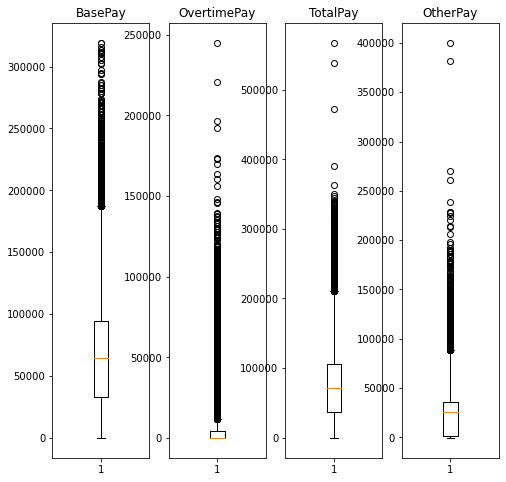

In [62]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(8,8))
axes[0].boxplot(df['BasePay'])
axes[0].set_title('BasePay')
axes[1].boxplot(df['OvertimePay'])
axes[1].set_title('OvertimePay')
axes[2].boxplot(df['TotalPay'])
axes[2].set_title('TotalPay')
axes[3].boxplot(df['OtherPay'])
axes[3].set_title('OtherPay')


fig.savefig("boxplots.png")

In [63]:
num_var=[]
cat_var=[]
for i in df.columns:
    if (df[i].dtypes=='object'):
        cat_var.append(i)
    else:
        num_var.append(i)

In [64]:
num_var

['BasePay', 'OvertimePay', 'OtherPay', 'TotalPay', 'Year']

In [65]:
cat_var

['EmployeeName', 'JobTitle', 'Agency']

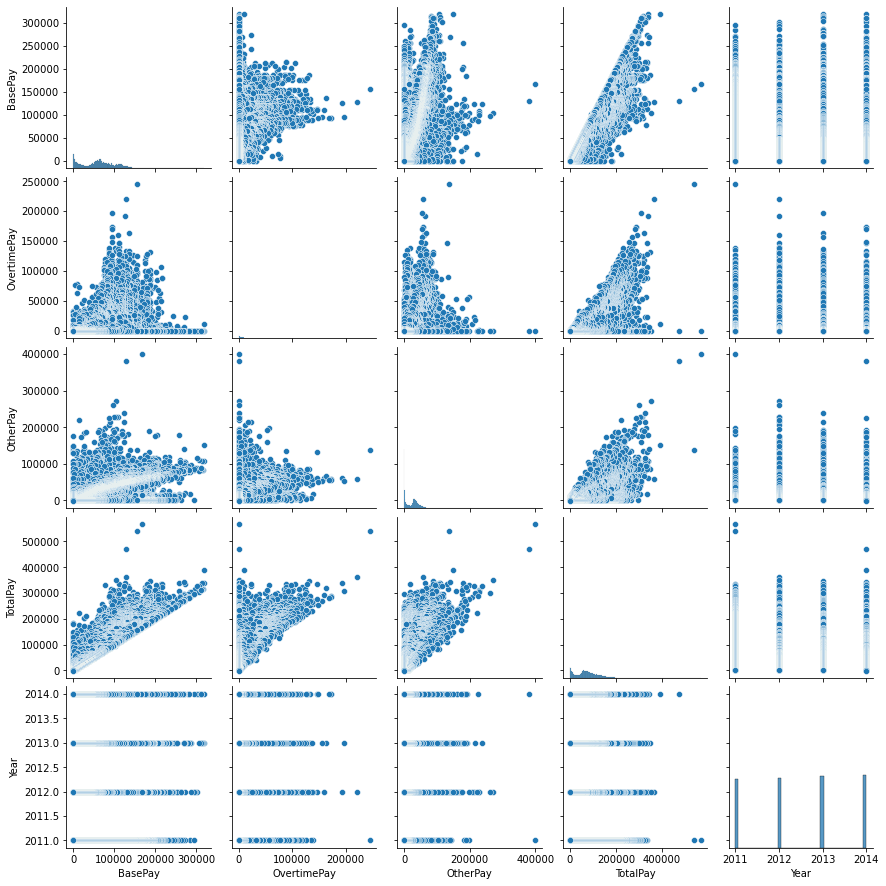

In [66]:
sns.pairplot(df)

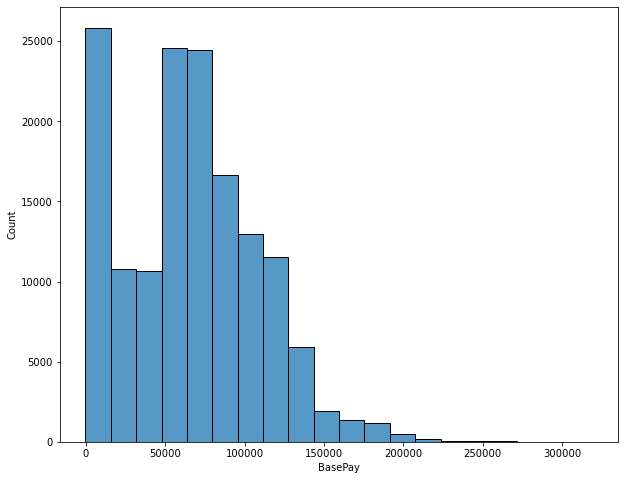

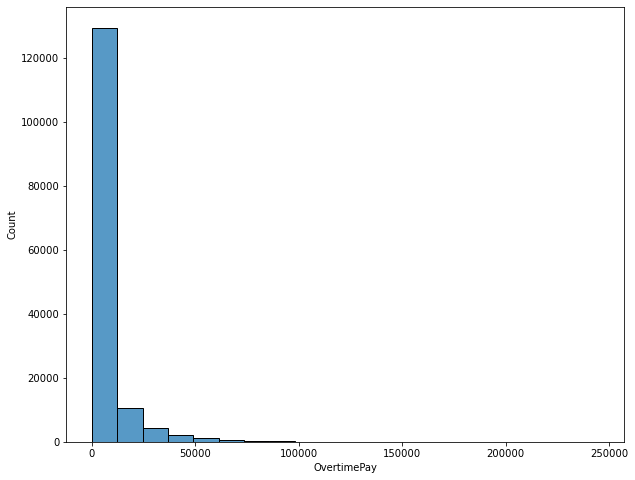

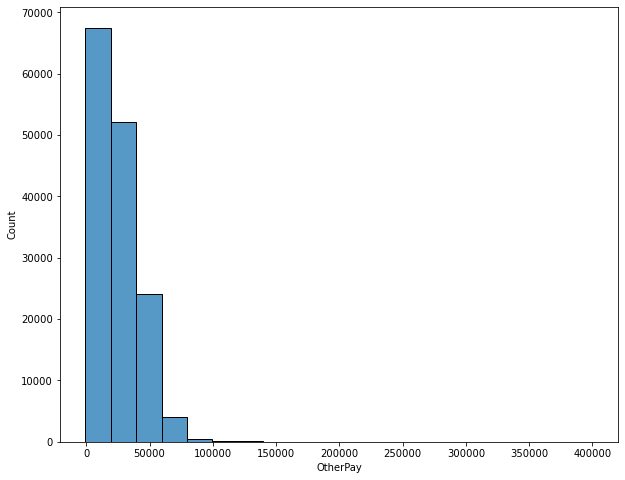

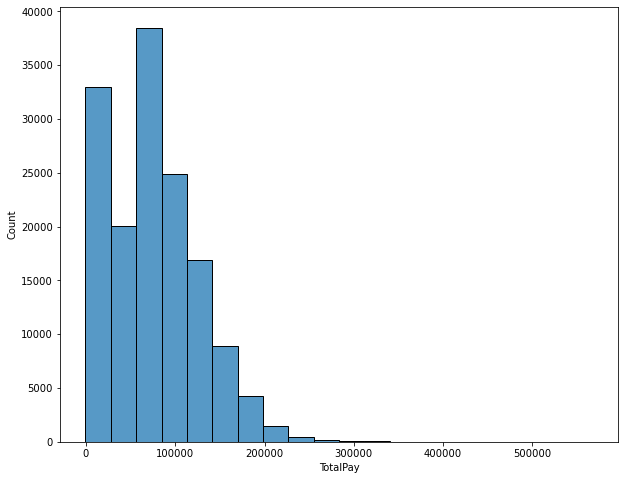

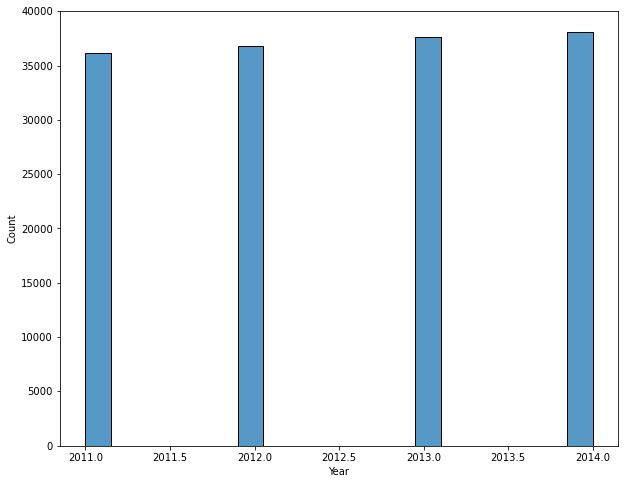

In [67]:
for i in num_var:
    plt.figure(figsize=(10,8))
    sns.histplot(df[i],kde=False,bins=20)

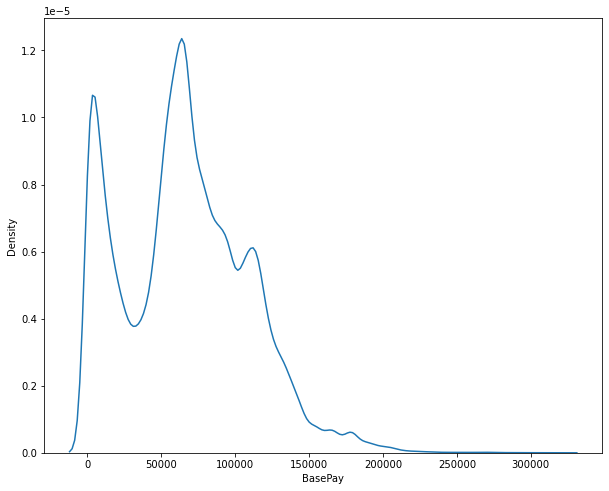

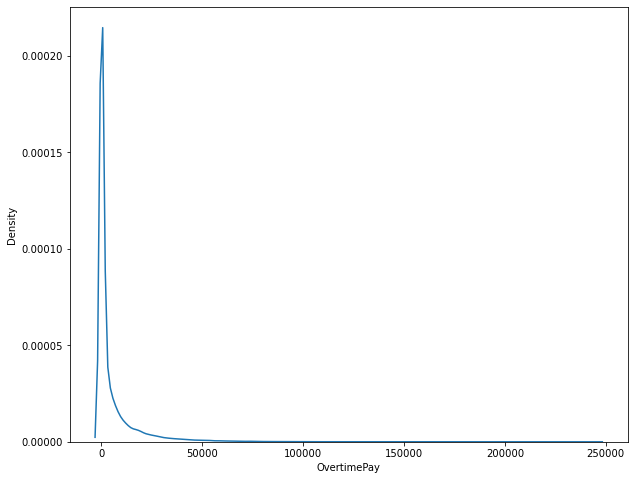

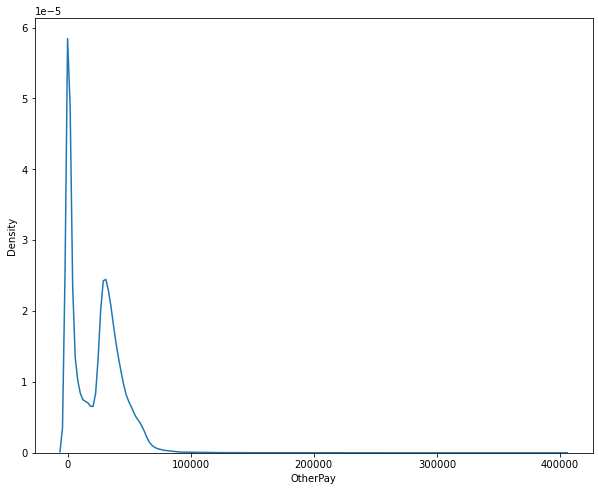

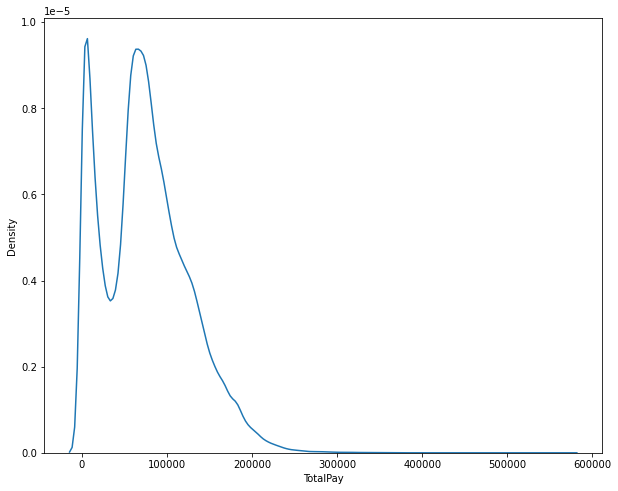

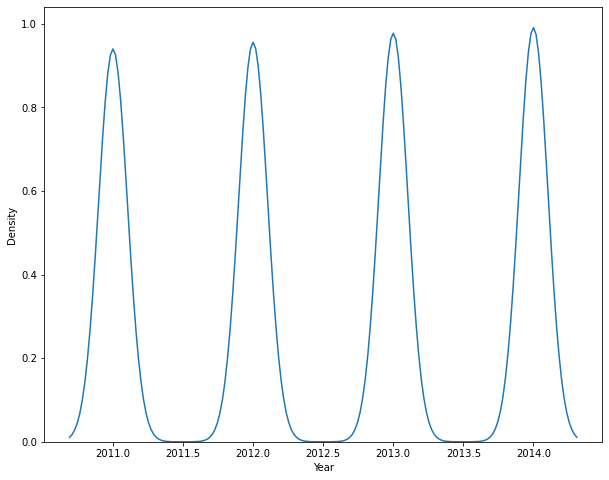

In [68]:
for i in num_var:
    plt.figure(figsize=(10,8))
    sns.kdeplot(x=df[i])

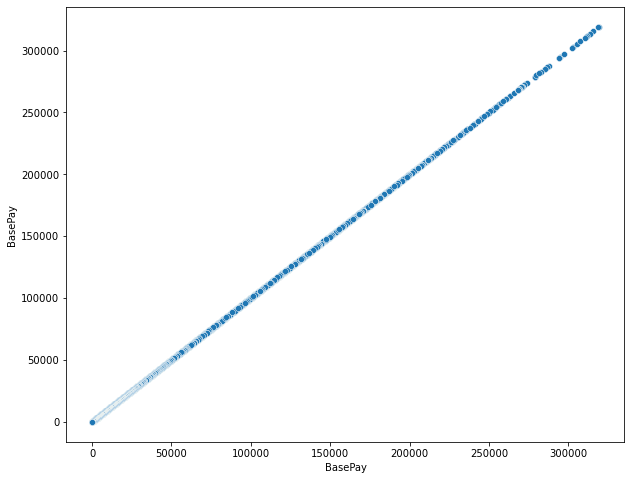

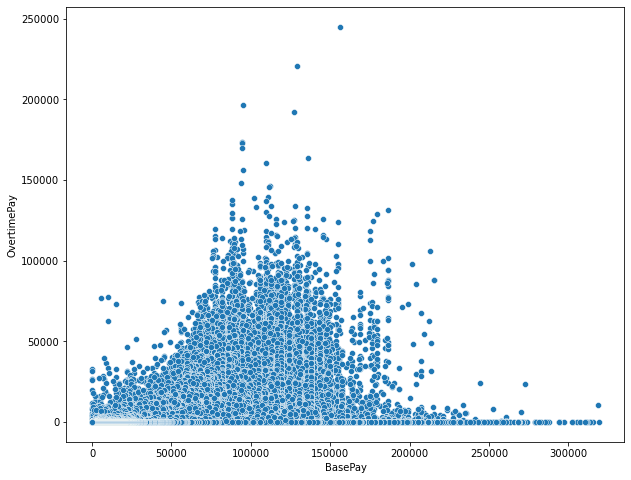

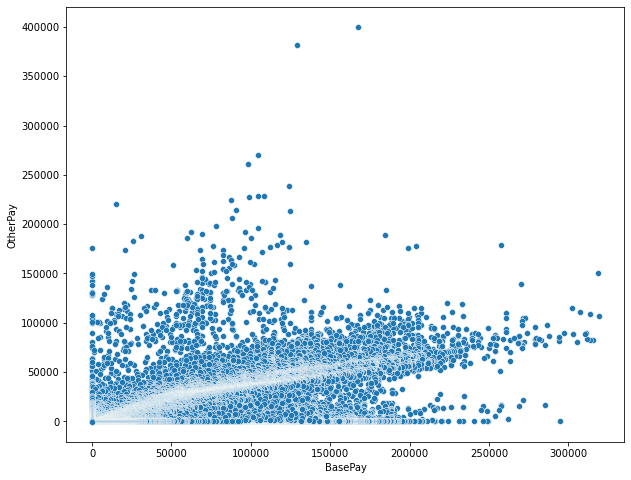

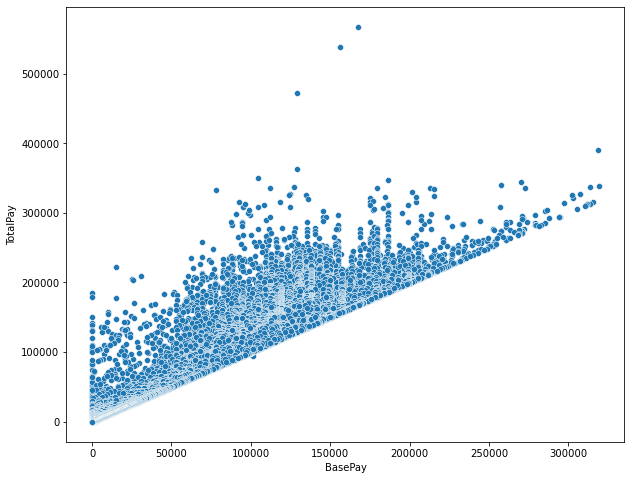

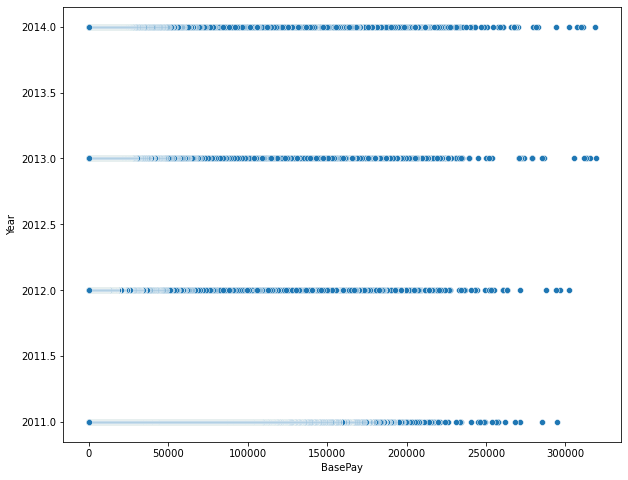

In [69]:
for i in num_var:
    plt.figure(figsize=(10,8))
    sns.scatterplot(x="BasePay",y=df[i],data=df)
    plt.show()